# Przygotowanie danych do prognozowania zmian kursów na podstawie ostatnich pięciu wartości

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test_path='../data/df_test'
df_train_path='../data/df_train'

In [3]:
path='../data/KGHM_clear.csv'
df=pd.read_pickle(path)

In [4]:
LEARN_SAMPLE_SIZE=5

In [5]:
df

,Date,Close,CoursChange,TimeDelta,day,month
0,2000-11-17 10:00:24,26.30,NaN,0.0,11/17/2000,11
4,2000-11-17 10:09:28,26.20,-0.10,544.0,11/17/2000,11
5,2000-11-17 10:11:10,26.30,0.10,102.0,11/17/2000,11
12,2000-11-17 10:39:32,26.20,-0.10,1702.0,11/17/2000,11
13,2000-11-17 10:47:47,26.30,0.10,495.0,11/17/2000,11
15,2000-11-17 10:56:02,26.40,0.10,495.0,11/17/2000,11
17,2000-11-17 11:00:15,26.30,-0.10,253.0,11/17/2000,11
19,2000-11-17 11:04:13,26.30,-0.10,238.0,11/17/2000,11
20,2000-11-17 11:16:27,26.40,0.10,734.0,11/17/2000,11
22,2000-11-17 11:17:50,26.30,-0.10,83.0,11/17/2000,11


In [6]:
df.head()

,Date,Close,CoursChange,TimeDelta,day,month
0,2000-11-17 10:00:24,26.3,NaN,0.0,11/17/2000,11
4,2000-11-17 10:09:28,26.2,-0.1,544.0,11/17/2000,11
5,2000-11-17 10:11:10,26.3,0.1,102.0,11/17/2000,11
12,2000-11-17 10:39:32,26.2,-0.1,1702.0,11/17/2000,11
13,2000-11-17 10:47:47,26.3,0.1,495.0,11/17/2000,11


In [7]:
# df=df[:100000]

# Grupowanie po dniach

In [8]:
gb=df.groupby(df.day)

df_group_by_day_list=[gb.get_group(x).copy() for x in gb.groups]

for i in df_group_by_day_list:
    i.reset_index

In [9]:
df_group_by_day_list[0]

,Date,Close,CoursChange,TimeDelta,day,month
7122,2001-01-02 10:00:05,25.2,-0.6,323402.0,01/02/2001,13
7129,2001-01-02 10:06:35,25.1,-0.1,390.0,01/02/2001,13
7132,2001-01-02 10:08:00,25.0,-0.1,85.0,01/02/2001,13
7134,2001-01-02 10:09:58,25.2,0.2,118.0,01/02/2001,13
7135,2001-01-02 10:10:01,25.0,-0.2,3.0,01/02/2001,13
7138,2001-01-02 10:18:12,25.1,0.1,491.0,01/02/2001,13
7140,2001-01-02 10:21:39,25.2,0.1,207.0,01/02/2001,13
7141,2001-01-02 10:21:57,25.1,-0.1,18.0,01/02/2001,13
7142,2001-01-02 10:30:02,25.3,0.2,485.0,01/02/2001,13
7144,2001-01-02 10:32:39,25.1,-0.1,157.0,01/02/2001,13


# Dla każdego dnia możemy przeprowadzić osobne operacje

In [10]:
def prepare_day(df_group_by_day_list,learn_sample_size=5,predict_next=True):
    
    if predict_next:
        predict_n_steps_future=1
    else:
        predict_n_steps_future=0
        raise ValueError("Predicting long then next doesnt work yet") 
    for i,df_group in enumerate(df_group_by_day_list):
        #resetowanie indeksow
        
        
        #dodawanie wczesniejszych wartosci pomiarow
        for j in range(1,learn_sample_size):
            df_group_by_day_list[i]['CoursChange-'+str(j)]=df_group_by_day_list[i].loc[:,('CoursChange')].shift(j)
            df_group_by_day_list[i]['TimeDelta_-'+str(j)]=df_group_by_day_list[i].TimeDelta.shift(j)
        
        #tworzenie wynikow
        df_group_by_day_list[i].loc[:,('y')]=df_group_by_day_list[i].loc[:,('CoursChange')].shift(-predict_n_steps_future)
        df_group_by_day_list[i].drop(df_group_by_day_list[i].head(learn_sample_size).index,inplace=True)
        df_group_by_day_list[i].drop(df_group_by_day_list[i].tail(predict_n_steps_future).index,inplace=True)
        df_group_by_day_list[i].reset_index(inplace=True,drop=True)
        #         df_group_by_day_list[i].drop(df_group_by_day_list[i][df_group_by_day_list[i].TimeDelta>4000].index)
#     Next step -> delate outstandig values


In [11]:
prepare_day(df_group_by_day_list,learn_sample_size=LEARN_SAMPLE_SIZE)

In [12]:
df_group_by_day_list[0]

,Date,Close,CoursChange,TimeDelta,day,month,CoursChange-1,TimeDelta_-1,CoursChange-2,TimeDelta_-2,CoursChange-3,TimeDelta_-3,CoursChange-4,TimeDelta_-4,y
0,2001-01-02 10:18:12,25.1,0.1,491.0,01/02/2001,13,-0.2,3.0,0.2,118.0,-0.1,85.0,-0.1,390.0,0.1
1,2001-01-02 10:21:39,25.2,0.1,207.0,01/02/2001,13,0.1,491.0,-0.2,3.0,0.2,118.0,-0.1,85.0,-0.1
2,2001-01-02 10:21:57,25.1,-0.1,18.0,01/02/2001,13,0.1,207.0,0.1,491.0,-0.2,3.0,0.2,118.0,0.2
3,2001-01-02 10:30:02,25.3,0.2,485.0,01/02/2001,13,-0.1,18.0,0.1,207.0,0.1,491.0,-0.2,3.0,-0.1
4,2001-01-02 10:32:39,25.1,-0.1,157.0,01/02/2001,13,0.2,485.0,-0.1,18.0,0.1,207.0,0.1,491.0,0.2
5,2001-01-02 10:34:05,25.3,0.2,86.0,01/02/2001,13,-0.1,157.0,0.2,485.0,-0.1,18.0,0.1,207.0,-0.1
6,2001-01-02 10:36:27,25.3,-0.1,142.0,01/02/2001,13,0.2,86.0,-0.1,157.0,0.2,485.0,-0.1,18.0,-0.2
7,2001-01-02 10:40:57,25.1,-0.2,270.0,01/02/2001,13,-0.1,142.0,0.2,86.0,-0.1,157.0,0.2,485.0,0.2
8,2001-01-02 10:42:26,25.3,0.2,89.0,01/02/2001,13,-0.2,270.0,-0.1,142.0,0.2,86.0,-0.1,157.0,-0.2
9,2001-01-02 10:43:29,25.1,-0.2,63.0,01/02/2001,13,0.2,89.0,-0.2,270.0,-0.1,142.0,0.2,86.0,0.2


In [13]:
df_merged=pd.concat(df_group_by_day_list, axis=0, ignore_index=True)

In [14]:
df_merged.month.min()

11

In [15]:
maximum=df_merged.month.max()
test=[]
train=[]
i=df_merged.month.min()
while i<(df_merged.month.max()+1):
    for j in range(i,i+6):
        train.append(j)
    i+=6
    i+=1
    for j in range(i,i+3):
        test.append(j)
    i+=3
    i+=1
    
    

In [16]:
gb=df_merged.groupby(df.month)

df_group_by_month_list=[gb.get_group(x).copy() for x in gb.groups]

for i in df_group_by_day_list:
    i.reset_index

In [17]:
test_df=[]
train_df=[]
for i in range(len(df_group_by_day_list)):
    x=df_group_by_day_list[i].month[0]
    if x in test:
        test_df.append(df_group_by_day_list[i])
    if x in train:
        train_df.append(df_group_by_day_list[i])
    

In [18]:
df_test=pd.concat(test_df, axis=0, ignore_index=True)
df_train=pd.concat(train_df, axis=0, ignore_index=True)

# Prawodpodobnie udało się podzielić na miesiące zgodnie ze wskazaniami 
# (6 train, 1 przerwy, 3 test, 1 przerwy)

In [19]:
x=df_test.month.unique()
x.sort()
x

array([ 18,  19,  20,  29,  30,  31,  40,  41,  42,  51,  52,  53,  62,
        63,  64,  73,  74,  75,  84,  85,  86,  95,  96,  97, 106, 107,
       108, 117, 118, 119, 128, 129, 130, 139, 140, 141, 150, 151, 152,
       161, 162, 163, 172, 173, 174, 183, 184, 185, 194, 195, 196, 205,
       206, 207, 216, 217, 218, 227, 228, 229])

In [20]:
x=df_train.month.unique()
x.sort()
x

array([ 11,  12,  13,  14,  15,  16,  22,  23,  24,  25,  26,  27,  33,
        34,  35,  36,  37,  38,  44,  45,  46,  47,  48,  49,  55,  56,
        57,  58,  59,  60,  66,  67,  68,  69,  70,  71,  77,  78,  79,
        80,  81,  82,  88,  89,  90,  91,  92,  93,  99, 100, 101, 102,
       103, 104, 110, 111, 112, 113, 114, 115, 121, 122, 123, 124, 125,
       126, 132, 133, 134, 135, 136, 137, 143, 144, 145, 146, 147, 148,
       154, 155, 156, 157, 158, 159, 165, 166, 167, 168, 169, 170, 176,
       177, 178, 179, 180, 181, 187, 188, 189, 190, 191, 192, 198, 199,
       200, 201, 202, 203, 209, 210, 211, 212, 213, 214, 220, 221, 222,
       223, 224, 225])

# Wygląda, że działa!

In [21]:
# df_merged[df_merged[df_merged.TimeDelta>8000].index[0]-2:df_merged[df_merged.TimeDelta>8000].index[0]+2]

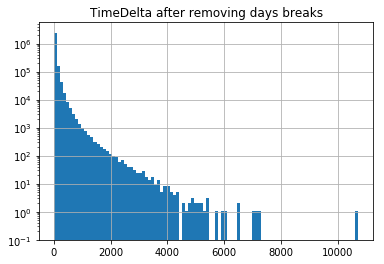

In [22]:
fig, ax = plt.subplots()
df_merged.TimeDelta.hist(ax=ax,bins=100, bottom=0.1)

# series.hist( bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title('TimeDelta after removing days breaks')
plt.show()

## Zapisanie danych treningowych i testowych do pliku

In [23]:

pd.to_pickle(df_test,df_test_path)

pd.to_pickle(df_train,df_train_path)